In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import signal
import xesmf as xe
 
from mlprecip_utils import *
from mlprecip_models import *
from mlprecip_xai import *
from mlprecip_plot import *

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
/homes/kpegion/.conda/envs/ml-precip/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/homes/kpegion/.conda/envs/ml-precip/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/homes/kpegion/.conda/envs/ml-precip/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/homes/kpegion

In [2]:
varname='precip'
model_types=['cnn_cat'] 

# Define Winter and Summer Months
winter=[12,1,2]
summer=[6,7,8]

target_dataset='era5-precip'
#target_dataset='era-interim-precip'

# Define number of models to fit
nmodels=100

### Read in train and test data

In [3]:
ds_features_tval=xr.open_dataset('../data/cnn/features_trainval.nc')
ds_target_tval=xr.open_dataset('../data/cnn/'+target_dataset+'/target_trainval.nc')

### Main Program to Train Models

Summer
cnn_cat
Upper Cat:  1748
Lower Cat:  1748
Check Features and Target Dimensions
Features (X):  (3496, 37, 92, 6)
Target (Y):  (3496, 2)
Training Size:  3146
Validation Size:  350
Epoch 00072: early stopping
Training set accuracy score: 0.6662428510450513
Validation set accuracy score: 0.545714293207441
Validation ROC AUC score: 0.6064450563860477
Epoch 00067: early stopping
Training set accuracy score: 0.6633820748696718
Validation set accuracy score: 0.5200000054069928
Validation ROC AUC score: 0.5955612378704432
Epoch 00069: early stopping
Training set accuracy score: 0.6258741298433481
Validation set accuracy score: 0.5428571445601327
Validation ROC AUC score: 0.5764489902963545
Epoch 00071: early stopping
Training set accuracy score: 0.663699940131185
Validation set accuracy score: 0.5514285766652652
Validation ROC AUC score: 0.6046747967479675
Epoch 00071: early stopping
Training set accuracy score: 0.6309599515526673
Validation set accuracy score: 0.5742857179471424
Validat

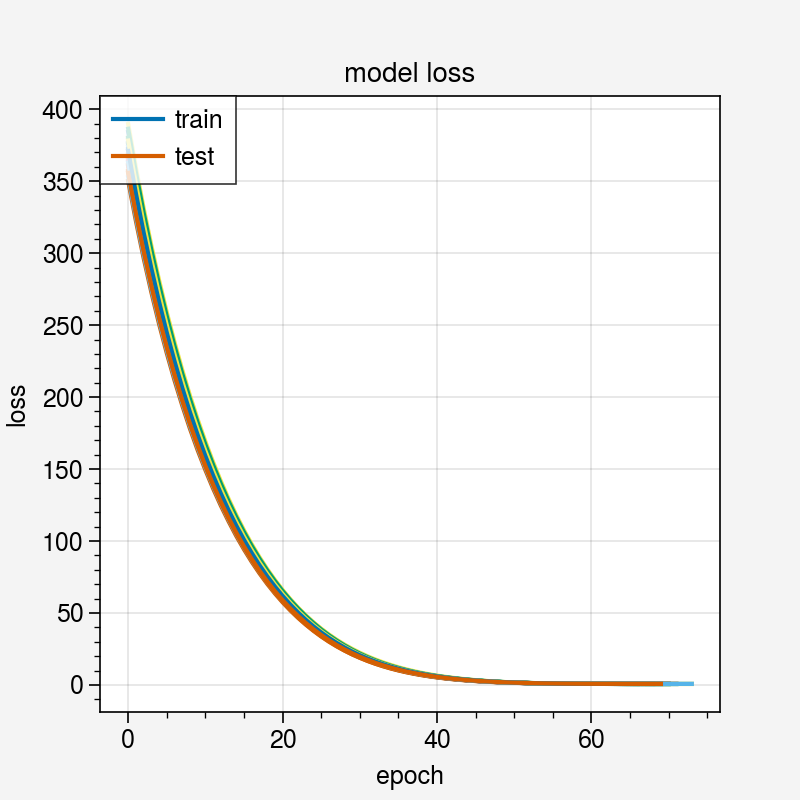

In [4]:
# Loop over seasons
#for seas,slabel,seas_abbrv in zip([winter,summer],['Winter','Summer'],['DJF','JJA']):
#for seas,slabel,seas_abbrv in zip([winter],['Winter'],['DJF']):
for seas,slabel,seas_abbrv in zip([summer],['Summer'],['JJA']):
    
    print(slabel)
                    
    # Select season from target precip anomalies
    ds_i=ds_target_tval.sel(time=ds_target_tval['time.month'].isin(seas)) 
    
    # Make sure we have the same times for target and features
    ds_t,ds_f=xr.align(ds_i.dropna(dim='time'),
                       ds_features_tval.dropna(dim='time'),
                       join='inner')

    # Subtract the median to ensure data is centered and classes are equal
    median=np.percentile(ds_t[varname],50)
    ds_t[varname]=ds_t[varname]-median
     
    #----- TRAIN MODELS  -----------#
     
    # Loop over Model Types    
    for m_function in model_types:
        print(m_function)
        fname='../data/cnn/'+target_dataset+'/models/seus.median.'+seas_abbrv+'.'+m_function
        ofname='../data/cnn/'+target_dataset+'/output/model_output.'+seas_abbrv+'.'+m_function
        trainCNN(m_function,ds_f,ds_t,varname,nmodels,fname=fname,ofname=ofname)
        
        